# Гипотеза: о наличии связи между цветом и популярностью
Некоторые цвета смартфонов более популярны по сравнению с другими.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('smartphones.csv')
print(data.head())


                                     Smartphone     Brand           Model  \
0            Realme C55 8/256GB Sunshower Libre    Realme             C55   
1      Samsung Galaxy M23 5G 4/128GB Azul Libre   Samsung      Galaxy M23   
2  Motorola Moto G13 4/128GB Azul Lavanda Libre  Motorola        Moto G13   
3      Xiaomi Redmi Note 11S 6/128GB Gris Libre    Xiaomi  Redmi Note 11S   
4       Nothing Phone (2) 12/512GB Blanco Libre   Nothing       Phone (2)   

    RAM  Storage   Color Free  Final Price  
0   8.0    256.0  Yellow  Yes       231.60  
1   4.0    128.0    Blue  Yes       279.00  
2   4.0    128.0    Blue  Yes       179.01  
3   6.0    128.0    Gray  Yes       279.99  
4  12.0    512.0   White  Yes       799.00  


In [5]:
print(data.isnull().sum())


Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64


In [11]:
data_cleaned = data.dropna().copy()

In [32]:

data_cleaned['Color'] = data_cleaned['Color'].astype('category').cat.codes
data_cleaned['Brand'] = data_cleaned['Brand'].astype('category').cat.codes
data_cleaned['Free'] = data_cleaned['Free'].astype('category').cat.codes
numeric_columns = data_cleaned.select_dtypes(include=['number'])


In [33]:
color_mapping = dict(enumerate(data['Color'].astype('category').cat.categories))
brand_mapping = dict(enumerate(data['Brand'].astype('category').cat.categories))
free_mapping = dict(enumerate(data['Free'].astype('category').cat.categories))

In [26]:
correlation_matrix = numeric_columns.corr()
print(correlation_matrix)

                Brand     Model       RAM   Storage     Color      Free  \
Brand        1.000000  0.035774  0.028469  0.062282  0.129252 -0.028405   
Model        0.035774  1.000000  0.021988  0.059442  0.017372 -0.017497   
RAM          0.028469  0.021988  1.000000  0.787645  0.077129 -0.016812   
Storage      0.062282  0.059442  0.787645  1.000000  0.071612  0.003161   
Color        0.129252  0.017372  0.077129  0.071612  1.000000 -0.055904   
Free        -0.028405 -0.017497 -0.016812  0.003161 -0.055904  1.000000   
Final Price  0.014316 -0.024944  0.690686  0.636792  0.078549 -0.104898   

             Final Price  
Brand           0.014316  
Model          -0.024944  
RAM             0.690686  
Storage         0.636792  
Color           0.078549  
Free           -0.104898  
Final Price     1.000000  


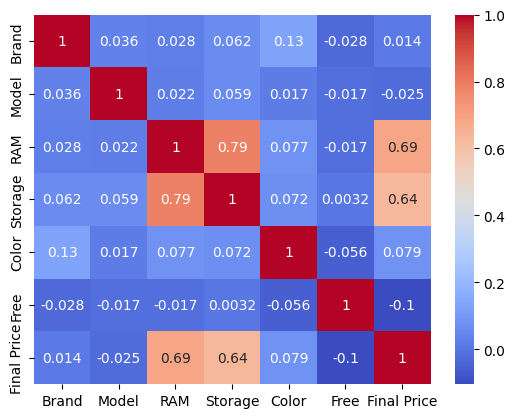

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

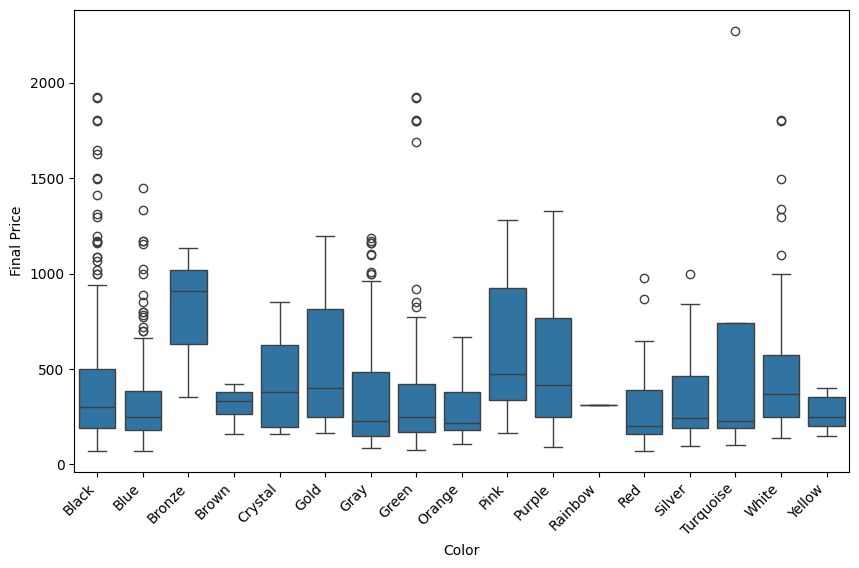

In [37]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x='Color', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(color_mapping)), labels=color_mapping.values(), rotation=45, ha='right')
plt.xlabel('Color')
plt.show()



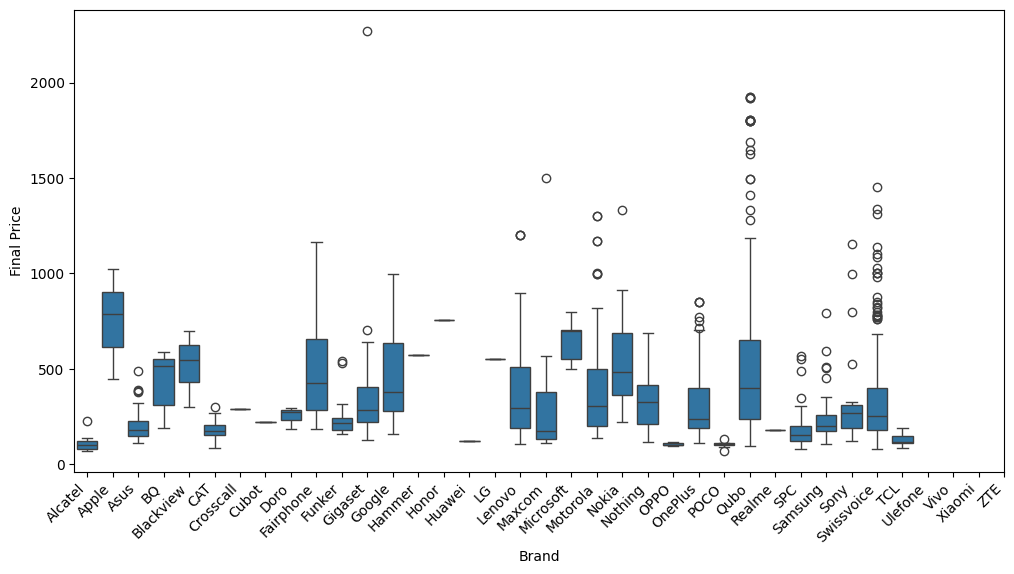

In [38]:
plt.figure(figsize=(12, 6))  
sns.boxplot(x='Brand', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(brand_mapping)), labels=brand_mapping.values(), rotation=45, ha='right')
plt.xlabel('Brand')
plt.show()


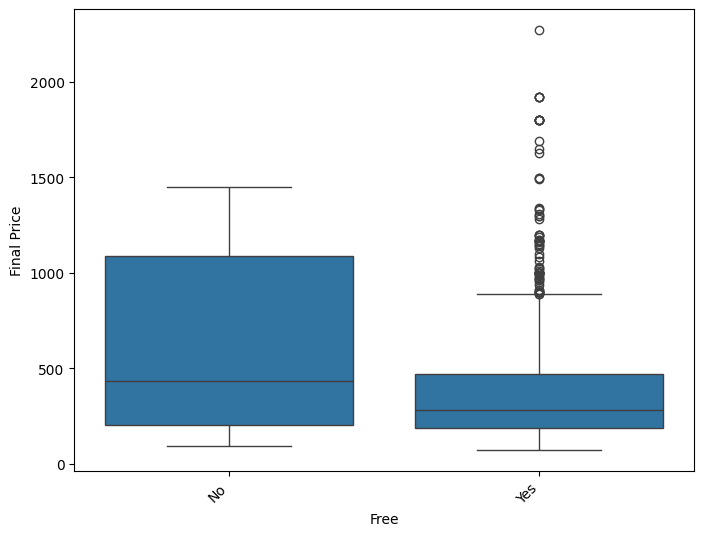

In [39]:
plt.figure(figsize=(8, 6))  
sns.boxplot(x='Free', y='Final Price', data=data_cleaned)
plt.xticks(ticks=range(len(free_mapping)), labels=free_mapping.values(), rotation=45, ha='right')
plt.xlabel('Free')
plt.show()

## Результат:
В ходе анализа данных была найдена кореляция между ОЗУ(RAM) и количеством встроенной памяти(Storage), а Корреляция между цветом смартфона и его ценой незначительна.

Так-же на графиках видно, что:
Цена значительно варьируется в зависимости от цвета смартфона (стандартное отклонение: 319.63).
Цена значительно варьируется в зависимости от бренда смартфона (стандартное отклонение: 179.04).
Цена значительно варьируется в зависимости от статуса блокировки оператором (стандартное отклонение: 364.72).